# **Emotion Analysis using SVM and K-Means Clustering**

### Objective: Develop an understanding of emotion recognition in text using Support Vector Machines (SVM) for classification and K-Means clustering for pattern discovery. This assignment will help you grasp the nuances of supervised and unsupervised learning techniques in Natural Language Processing (NLP). 

In [220]:
# Cell 1 - Required library Instalations

# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install nltk
# %pip install imbalanced-learn
# %pip install gensim


In [221]:
# Cell 2 - Required packages downloaded

# nltk.download('punkt')
# Download WordNet data
# nltk.download('wordnet')

In [222]:
# Cell 3

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string

In [223]:
# cell 4

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score


# **Data Preparation**

## **Step 1 - Load and familiarize yourself with the EmotionLines dataset.**

In [224]:
# cell 5

train_df = pd.read_json('friends_train.json')
test_df = pd.read_json('friends_test.json')
holdout_df = pd.read_json('friends_dev.json')

print("Training Dataset:")
print(train_df.head(3))

print("\nTest Dataset:")
print(test_df.head(3))

print("\nHoldout Dataset:")
print(holdout_df.head(3))


Training Dataset:
                                                  0   \
0  {'speaker': 'Chandler', 'utterance': 'also I w...   
1  {'speaker': 'Chandler', 'utterance': 'Hey, Mon...   
2  {'speaker': 'Rachel', 'utterance': 'Hey!', 'em...   

                                                  1   \
0  {'speaker': 'The Interviewer', 'utterance': 'Y...   
1  {'speaker': 'Monica', 'utterance': 'Hey-hey-he...   
2  {'speaker': 'Ross', 'utterance': 'Hi!', 'emoti...   

                                                  2   \
0  {'speaker': 'Chandler', 'utterance': 'That I d...   
1  {'speaker': 'Chandler', 'utterance': 'Do I eve...   
2  {'speaker': 'Rachel', 'utterance': 'What are y...   

                                                  3   \
0  {'speaker': 'The Interviewer', 'utterance': 'S...   
1  {'speaker': 'Monica', 'utterance': 'Chris says...   
2  {'speaker': 'Ross', 'utterance': 'Ah y'know, t...   

                                                  4   \
0  {'speaker': 'Chandler',

In [225]:
# Cell 6

print(train_df.shape)
print(test_df.shape)
print(holdout_df.shape)

(720, 24)
(200, 24)
(80, 24)


In [226]:
# cell 7

train_df.info()
test_df.info()
holdout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       720 non-null    object
 1   1       720 non-null    object
 2   2       720 non-null    object
 3   3       720 non-null    object
 4   4       720 non-null    object
 5   5       688 non-null    object
 6   6       655 non-null    object
 7   7       620 non-null    object
 8   8       579 non-null    object
 9   9       547 non-null    object
 10  10      520 non-null    object
 11  11      484 non-null    object
 12  12      444 non-null    object
 13  13      408 non-null    object
 14  14      367 non-null    object
 15  15      333 non-null    object
 16  16      292 non-null    object
 17  17      253 non-null    object
 18  18      224 non-null    object
 19  19      189 non-null    object
 20  20      142 non-null    object
 21  21      102 non-null    object
 22  22      79 non-null     ob

In [227]:
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"{'speaker': 'Chandler', 'utterance': 'also I w...","{'speaker': 'The Interviewer', 'utterance': 'Y...","{'speaker': 'Chandler', 'utterance': 'That I d...","{'speaker': 'The Interviewer', 'utterance': 'S...","{'speaker': 'Chandler', 'utterance': 'My dutie...","{'speaker': 'The Interviewer', 'utterance': 'N...","{'speaker': 'Chandler', 'utterance': 'I see.',...","{'speaker': 'The Interviewer', 'utterance': 'B...","{'speaker': 'Chandler', 'utterance': 'Good to ...","{'speaker': 'The Interviewer', 'utterance': 'W...",...,"{'speaker': 'Joey', 'utterance': 'But then who...","{'speaker': 'Rachel', 'utterance': 'You know? ...","{'speaker': 'Joey', 'utterance': 'No-no-no-no,...","{'speaker': 'Rachel', 'utterance': 'No, I-I-I-...","{'speaker': 'Joey', 'utterance': 'Ok!', 'emoti...","{'speaker': 'Joey', 'utterance': 'All right, w...","{'speaker': 'Joey', 'utterance': 'I'm gonna se...","{'speaker': 'Joey', 'utterance': 'I'll see you...","{'speaker': 'Rachel', 'utterance': 'Yeah, sure...",None
1,"{'speaker': 'Chandler', 'utterance': 'Hey, Mon...","{'speaker': 'Monica', 'utterance': 'Hey-hey-he...","{'speaker': 'Chandler', 'utterance': 'Do I eve...","{'speaker': 'Monica', 'utterance': 'Chris says...","{'speaker': 'Chandler', 'utterance': 'No way!'...","{'speaker': 'Monica', 'utterance': 'Yeah, appa...","{'speaker': 'Chandler', 'utterance': 'Just cof...","{'speaker': 'Monica', 'utterance': 'Got me.', ...","{'speaker': 'Chandler', 'utterance': 'Can I ge...","{'speaker': 'Monica', 'utterance': 'Hey, did y...",...,"{'speaker': 'Chandler', 'utterance': 'What, wh...","{'speaker': 'Phoebe', 'utterance': 'What?!', '...","{'speaker': 'Phoebe', 'utterance': 'He was wit...","{'speaker': 'Phoebe', 'utterance': 'Look, 'My...","{'speaker': 'Phoebe', 'utterance': 'Now that I...","{'speaker': 'Phoebe', 'utterance': 'He thinks ...","{'speaker': 'Chandler', 'utterance': 'You real...","{'speaker': 'Phoebe', 'utterance': 'Oh, totall...","{'speaker': 'Joey', 'utterance': 'Done.', 'emo...",None
2,"{'speaker': 'Rachel', 'utterance': 'Hey!', 'em...","{'speaker': 'Ross', 'utterance': 'Hi!', 'emoti...","{'speaker': 'Rachel', 'utterance': 'What are y...","{'speaker': 'Ross', 'utterance': 'Ah y'know, t...","{'speaker': 'Rachel', 'utterance': 'Oh.', 'emo...","{'speaker': 'Ross', 'utterance': 'Hi.', 'emoti...","{'speaker': 'Rachel', 'utterance': 'Hi.', 'emo...","{'speaker': 'Ross', 'utterance': 'Howd did it...","{'speaker': 'Rachel', 'utterance': 'Oh well, t...","{'speaker': 'Ross', 'utterance': 'Im so proud...",...,"{'speaker': 'Rachel', 'utterance': 'Yeah.', 'e...","{'speaker': 'Phoebe', 'utterance': 'Ameri-can....","{'speaker': 'Sergei', 'utterance': 'Ameri-ccan...","{'speaker': 'Phoebe', 'utterance': 'Ameri-can....","{'speaker': 'Sergei', 'utterance': 'Everybody!...",None,None,None,None,None
3,"{'speaker': 'Chandler', 'utterance': 'Good job...","{'speaker': 'Joey', 'utterance': 'You liked it...","{'speaker': 'Chandler', 'utterance': 'Oh-ho-ho...","{'speaker': 'Joey', 'utterance': 'Which part e...","{'speaker': 'Chandler', 'utterance': 'The whol...","{'speaker': 'Joey', 'utterance': 'Oh no-no-no,...","{'speaker': 'Chandler', 'utterance': 'I love t...","{'speaker': 'Joey', 'utterance': 'Hey, what ab...","{'speaker': 'Chandler', 'utterance': 'I was su...","{'speaker': 'Joey', 'utterance': 'You fell asl...",...,"{'speaker': 'Chandler', 'utterance': 'Dont go...","{'speaker': 'Chandler', 'utterance': 'Im sorr...","{'speaker': 'Chandler', 'utterance': 'Im so s...","{'speaker': 'Chandler', 'utterance': 'Look!', ...","{'speaker': 'Chandler', 'utterance': 'This guy...","{'speaker': 'Chandler', 'utterance': 'He fell ...","{'speaker': 'Chandler', 'utterance': 'Be mad a...","{'speaker': 'Chandler', 'utterance': 'Or, call...",None,None
4,"{'speaker': 'Joey', 'utterance': 'Okay, look, ...","{'speaker': 'Ross', 'utterance': 'What?! What ...","{'speaker': 'Phoebe', 'utterance': 'Yes, and i...","{'speaker': 'Phoebe', 'utt

In [228]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"{'speaker': 'Mark', 'utterance': 'Why do all y...","{'speaker': 'Rachel', 'utterance': 'Oh. Thats...","{'speaker': 'Rachel', 'utterance': 'Y'know wha...","{'speaker': 'Ross', 'utterance': 'It didnt.',...","{'speaker': 'Frank', 'utterance': 'Okay, so wh...","{'speaker': 'Joey', 'utterance': 'Now, wh-what...","{'speaker': 'Frank', 'utterance': 'Its so coo...","{'speaker': 'Ross', 'utterance': 'Yeah, yeah.'...","{'speaker': 'Joey', 'utterance': 'Why cant I ...","{'speaker': 'Ross', 'utterance': 'Dont ask me...",...,"{'speaker': 'Frank', 'utterance': 'Its out th...","{'speaker': 'Joey', 'utterance': 'Then you hol...","{'speaker': 'Frank', 'utterance': 'All right, ...","{'speaker': 'Joey', 'utterance': 'All right, c...",None,None,None,None,None,None
1,"{'speaker': 'Joey', 'utterance': 'Come on, Lyd...","{'speaker': 'Joey', 'utterance': 'Push!', 'emo...","{'speaker': 'Joey', 'utterance': 'Push 'em out...","{'speaker': 'Joey', 'utterance': 'Push 'em out...","{'speaker': 'Joey', 'utterance': 'Let's get th...","{'speaker': 'Joey', 'utterance': 'Let's I wa...","{'speaker': 'Joey', 'utterance': 'Push!', 'emo...","{'speaker': 'Joey', 'utterance': 'Push!', 'emo...",None,None,...,None,None,None,None,None,None,None,None,None,None
2,"{'speaker': 'Ross', 'utterance': 'Okay.', 'emo...","{'speaker': 'Rachel', 'utterance': 'Ross, didn...","{'speaker': 'Ross', 'utterance': 'Uhh, yes I d...","{'speaker': 'Ross', 'utterance': 'Okay, go lef...","{'speaker': 'Rachel', 'utterance': 'Okay, y'kn...","{'speaker': 'Ross', 'utterance': 'Oh okay, lif...","{'speaker': 'Ross', 'utterance': 'Straight up ...","{'speaker': 'Ross', 'utterance': 'You can do i...","{'speaker': 'Ross', 'utterance': 'You can do i...","{'speaker': 'Ross', 'utterance': 'Okay.', 'emo...",...,"{'speaker': 'Ross', 'utterance': 'Yes but too ...","{'speaker': 'Steve', 'utterance': 'Okay, fine,...","{'speaker': 'Ross', 'utterance': 'Ugh, can you...","{'speaker': 'Phoebe', 'utterance': 'Yeah. I re...",None,None,None,None,None,None
3,"{'speaker': 'Phoebe', 'utterance': 'Ohh!', 'em...","{'speaker': 'Monica', 'utterance': 'What?', 'e...","{'speaker': 'Phoebe', 'utterance': 'It kicked!...","{'speaker': 'Monica', 'utterance': 'Oh my God!...","{'speaker': 'Phoebe', 'utterance': 'Oh no wait...","{'speaker': 'Joey', 'utterance': 'Oh my God! I...","{'speaker': 'Monica', 'utterance': 'Oh wait, J...","{'speaker': 'Joey', 'utterance': 'Look, I know...","{'speaker': 'Joey', 'utterance': 'Theyre just...","{'speaker': 'Chandler', 'utterance': 'Youre c...",...,"{'speaker': 'Chandler', 'utterance': 'So uh, w...","{'speaker': 'Marjorie', 'utterance': 'I talk i...","{'speaker': 'Chandler', 'utterance': 'What a c...","{'speaker': 'Joey', 'utterance': 'So why dont...",None,None,None,None,None,None
4,"{'speaker': 'Joey', 'utterance': 'Previously o...","{'speaker': 'Monica', 'utterance': 'I dont kn...","{'speaker': 'Phoebe', 'utterance': 'Oh?!', 'em...","{'speaker': 'Monica', 'utterance': 'Yeah, but ...","{'speaker': 'Phoebe', 'utterance': 'Oh.', 'emo...","{'speaker': 'Joey', 'utterance': 'And its not...","{'speaker': 'Chandler', 'utterance': 'Yeah, it...","{'speaker': 'Monica', 'utterance': 'So you can...","{'speaker': 'Ross', 'utterance': 'Yeah, anythi...","{'speaker': 'Monica', 'utterance': 'Whats fis...",...,None,None,None,None,None,None,None,None,None,None


In [229]:
holdout_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"{'speaker': 'Phoebe', 'utterance': 'Oh my God,...","{'speaker': 'Monica', 'utterance': 'What?', 'e...","{'speaker': 'Ross', 'utterance': 'Or! Or, we c...","{'speaker': 'Chandler', 'utterance': 'Youre a...","{'speaker': 'Joey', 'utterance': 'Aww, man, no...","{'speaker': 'Chandler', 'utterance': 'Now, the...","{'speaker': 'Phoebe', 'utterance': 'Hey.', 'em...","{'speaker': 'All', 'utterance': 'Hey!', 'emoti...","{'speaker': 'Phoebe', 'utterance': 'Ohh, you g...","{'speaker': 'Rachel', 'utterance': 'Where?!', ...",...,"{'speaker': 'Monica', 'utterance': 'Well, next...","{'speaker': 'Joey', 'utterance': 'Yeah! Yeah! ...","{'speaker': 'Chandler', 'utterance': 'Thank yo...","{'speaker': 'Joey', 'utterance': 'No-no, thank...",None,None,None,None,None,None
1,"{'speaker': 'Joey', 'utterance': 'Hey Estelle,...","{'speaker': 'Estelle', 'utterance': 'Well! Wel...","{'speaker': 'Joey', 'utterance': 'What are you...","{'speaker': 'Estelle', 'utterance': 'Really?!'...","{'speaker': 'Joey', 'utterance': 'Yeah!', 'emo...","{'speaker': 'Estelle', 'utterance': 'Oh well, ...","{'speaker': 'Gary', 'utterance': 'Okay, you gu...","{'speaker': 'Ross', 'utterance': 'Yeah!!', 'em...","{'speaker': 'Chandler', 'utterance': 'Tonight?...",None,...,None,None,None,None,None,None,None,None,None,None
2,"{'speaker': 'Ross', 'utterance': 'Yes? Yes?! H...","{'speaker': 'Guy', 'utterance': 'Yeah, we were...","{'speaker': 'Ross', 'utterance': 'Oh-oh, your...","{'speaker': 'Ross', 'utterance': 'What exactly...","{'speaker': 'Ross', 'utterance': 'Perhaps, pe...","{'speaker': 'Guy', 'utterance': 'Uhh .', 'emot...","{'speaker': 'Ross', 'utterance': 'Ah Ah Get o...","{'speaker': 'Woman', 'utterance': 'Uh, actuall...","{'speaker': 'Ross', 'utterance': 'I find Mario...","{'speaker': 'Woman', 'utterance': 'Im sorry, ...",...,"{'speaker': 'Ross', 'utterance': 'Well I uh, I...",None,None,None,None,None,None,None,None,None
3,"{'speaker': 'Ross', 'utterance': 'You had no r...","{'speaker': 'Rachel', 'utterance': 'What?', 'e...","{'speaker': 'Ross', 'utterance': 'I was doing ...","{'speaker': 'Rachel', 'utterance': 'Hey, I was...","{'speaker': 'Ross', 'utterance': 'The point is...","{'speaker': 'Ross', 'utterance': 'I don't need...","{'speaker': 'Ross', 'utterance': 'It, it's too...","{'speaker': 'Ross', 'utterance': 'This ship ha...","{'speaker': 'Rachel', 'utterance': 'Alright, f...","{'speaker': 'Ross', 'utterance': 'Fine.', 'emo...",...,None,None,None,None,None,None,None,None,None,None
4,"{'speaker': 'Phoebe', 'utterance': 'Oh, it's s...","{'speaker': 'Joey', 'utterance': 'Yknow, Moni...","{'speaker': 'Phoebe', 'utterance': 'All in goo...","{'speaker': 'Phoebe', 'utterance': 'All in goo...","{'speaker': 'Phoebe', 'utterance': 'Oh shoot!'...","{'speaker': 'Phoebe', 'utterance': 'I left my ...","{'speaker': 'Phoebe', 'utterance': 'Well you c...","{'speaker': 'Joey', 'utterance': 'I dont have...","{'speaker': 'Phoebe', 'utterance': 'What?! The...","{'speaker': 'Joey', 'utterance': 'Why would th...",...,"{'speaker': 'Ross', 'utterance': 'Uh, what?', ...","{'speaker': 'Rachel', 'utterance': 'Yes! Shes...","{'speaker': 'Ross', 'utterance': 'WhatYoure ...","{'speaker': 'Ross', 'utterance': 'I mean shes...","{'speaker': 'Ross', 'utterance': 'Shell drive...","{'speaker': 'Mrs. Green', 'utterance': 'Hi Ros...","{'speaker': 'Ross', 'utterance': 'Hi roomie!',...",None,None,None


In [230]:
# Cell 9

train_df_backup = train_df.copy()
test_df_backup = test_df.copy()
holdout_df_backup = holdout_df.copy()

## **Step 2 - Conduct Text Preprocessing** 

### **Tokenization**

In [231]:
# Cell 10

# Updated Tokenization Function
def tokenize_utterances(cell, key='utterance'):
    # Check if the cell is a dictionary and has the specified key
    if isinstance(cell, dict) and key in cell:
        return word_tokenize(cell[key])
    else:
        return []
# Columns that contain JSON objects with utterances
json_columns = list(range(24))  # Adjust this list based on your DataFrame (0 to 23)

# Apply tokenization to each JSON column
for col in json_columns:
    col_name = f'tokenized_{col}'
    train_df[col_name] = train_df[col].apply(lambda x: tokenize_utterances(x, key='utterance'))

# Display the results for verification
print("Modified Training DataFrame:")
print(train_df[[f'tokenized_{col}' for col in json_columns]].head())


Modified Training DataFrame:
                                         tokenized_0  \
0  [also, I, was, the, point, person, on, my, com...   
1                                   [Hey, ,, Mon, .]   
2                                           [Hey, !]   
3  [Good, job, Joe, !, Well, done, !, Top, notch, !]   
4  [Okay, ,, look, ,, I, think, we, have, to, tel...   

                                         tokenized_1  \
0          [You, mustve, had, your, hands, full, .]   
1  [Hey-hey-hey, ., You, wan, na, hear, something...   
2                                            [Hi, !]   
3     [You, liked, it, ?, You, really, liked, it, ?]   
4  [What, ?, !, What, is, with, everybody, ?, It...   

                                         tokenized_2  \
0                 [That, I, did, ., That, I, did, .]   
1                                   [Do, I, ever, .]   
2                   [What, are, you, doing, here, ?]   
3                             [Oh-ho-ho, ,, yeah, !]   
4  [Yes, ,, and, 

### **Removing Stopwords**

In [232]:
# Cell 11

# Load English stopwords
stop_words = set(stopwords.words('english'))
# Updated Stopword Removal Function
# def remove_stopwords(tokens, stop_words):
#     return [token for token in tokens if token not in stop_words]

def remove_stopwords(tokens, *args):
    stop_words = args[0] if args else set()
    return [token for token in tokens if token not in stop_words]

# Ensure all column names are strings
train_df.columns = train_df.columns.astype(str)

# Columns that contain tokenized utterances
tokenized_columns = [col for col in train_df.columns if str(col).startswith('tokenized')]

# Apply the function to remove stop words from each tokenized column
for col in tokenized_columns:
    train_df[col] = train_df[col].apply(lambda x: remove_stopwords(x, stop_words))

# Display the results for verification
print("DataFrame with Stop Words Removed:")
print(train_df[tokenized_columns].head())


DataFrame with Stop Words Removed:
                                         tokenized_0  \
0  [also, I, point, person, companys, transition...   
1                                   [Hey, ,, Mon, .]   
2                                           [Hey, !]   
3  [Good, job, Joe, !, Well, done, !, Top, notch, !]   
4  [Okay, ,, look, ,, I, think, tell, Rachel, mes...   

                                         tokenized_1  \
0                     [You, mustve, hands, full, .]   
1  [Hey-hey-hey, ., You, wan, na, hear, something...   
2                                            [Hi, !]   
3             [You, liked, ?, You, really, liked, ?]   
4  [What, ?, !, What, everybody, ?, Its, Thanksg...   

                      tokenized_2  \
0        [That, I, ., That, I, .]   
1                [Do, I, ever, .]   
2                       [What, ?]   
3          [Oh-ho-ho, ,, yeah, !]   
4  [Yes, ,, dying, wish, ring, .]   

                                         tokenized_3  \
0          [

### **Lemmatization**

In [233]:
# Cell 12

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Updated Lemmatization Function
def lemmatize_tokens(tokens, lemmatizer):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Columns that contain tokenized and stop words-removed text
lemmatized_columns = [col for col in train_df.columns if col.startswith('tokenized')]

# Apply the function to perform lemmatization on each column
for col in lemmatized_columns:
    train_df[col] = train_df[col].apply(lambda x: lemmatize_tokens(x, lemmatizer))

# Display the results for verification
print("DataFrame after Lemmatization:")
print(train_df[lemmatized_columns].head())

DataFrame after Lemmatization:
                                         tokenized_0  \
0  [also, I, point, person, companys, transition...   
1                                   [Hey, ,, Mon, .]   
2                                           [Hey, !]   
3  [Good, job, Joe, !, Well, done, !, Top, notch, !]   
4  [Okay, ,, look, ,, I, think, tell, Rachel, mes...   

                                         tokenized_1  \
0                      [You, mustve, hand, full, .]   
1  [Hey-hey-hey, ., You, wan, na, hear, something...   
2                                            [Hi, !]   
3             [You, liked, ?, You, really, liked, ?]   
4  [What, ?, !, What, everybody, ?, Its, Thanksg...   

                      tokenized_2  \
0        [That, I, ., That, I, .]   
1                [Do, I, ever, .]   
2                       [What, ?]   
3          [Oh-ho-ho, ,, yeah, !]   
4  [Yes, ,, dying, wish, ring, .]   

                                         tokenized_3  \
0            [So

### **Remove Punctuation and Lowercasing**

In [234]:
# Cell 13

# Updated Punctuation Removal and Lowercasing Function
def remove_punctuation_and_lower(tokens, lowercase=True):
    tokens = [token for token in tokens if token not in string.punctuation]
    return [token.lower() for token in tokens] if lowercase else tokens

# Columns that contain lemmatized text
processed_columns = [col for col in train_df.columns if col.startswith('tokenized')]

# Apply the function to remove punctuation and convert to lower case
for col in processed_columns:
    train_df[col] = train_df[col].apply(lambda x: remove_punctuation_and_lower(x, lowercase=True))

# Display the results for verification
print("DataFrame after Removing Punctuation and Lowercasing:")
print(train_df[processed_columns].head())


DataFrame after Removing Punctuation and Lowercasing:
                                         tokenized_0  \
0  [also, i, point, person, companys, transition...   
1                                         [hey, mon]   
2                                              [hey]   
3           [good, job, joe, well, done, top, notch]   
4  [okay, look, i, think, tell, rachel, messed, d...   

                                         tokenized_1  \
0                         [you, mustve, hand, full]   
1  [hey-hey-hey, you, wan, na, hear, something, s...   
2                                               [hi]   
3                   [you, liked, you, really, liked]   
4  [what, what, everybody, its, thanksgiving, .....   

                tokenized_2  \
0        [that, i, that, i]   
1             [do, i, ever]   
2                    [what]   
3          [oh-ho-ho, yeah]   
4  [yes, dying, wish, ring]   

                                         tokenized_3  \
0               [so, lets, t

### **Verifying text preprocessing**

In [235]:
# Cell 14

# Verify Tokenization
for col in json_columns:
    col_name = f'tokenized_{col}'
    print(f"Tokenized {col_name}:\n{train_df[col_name].head()}")

# Verify Stopword Removal
for col in tokenized_columns:
    print(f"After Stopword Removal {col}:\n{train_df[col].head()}")

# Verify Lemmatization
for col in lemmatized_columns:
    print(f"After Lemmatization {col}:\n{train_df[col].head()}")

# Verify Punctuation Removal and Lowercasing
for col in processed_columns:
    print(f"After Punctuation Removal and Lowercasing {col}:\n{train_df[col].head()}")


Tokenized tokenized_0:
0    [also, i, point, person, companys, transition...
1                                           [hey, mon]
2                                                [hey]
3             [good, job, joe, well, done, top, notch]
4    [okay, look, i, think, tell, rachel, messed, d...
Name: tokenized_0, dtype: object
Tokenized tokenized_1:
0                           [you, mustve, hand, full]
1    [hey-hey-hey, you, wan, na, hear, something, s...
2                                                 [hi]
3                     [you, liked, you, really, liked]
4    [what, what, everybody, its, thanksgiving, .....
Name: tokenized_1, dtype: object
Tokenized tokenized_2:
0          [that, i, that, i]
1               [do, i, ever]
2                      [what]
3            [oh-ho-ho, yeah]
4    [yes, dying, wish, ring]
Name: tokenized_2, dtype: object
Tokenized tokenized_3:
0                 [so, lets, talk, little, bit, duty]
1                  [chris, say, theyre, closing, bar]

In [236]:
test_df_backup = test_df.copy()

### **Applying Preprocessing on Test Data**

In [237]:
# Cell 15

# Repeat the preprocessing steps for test_df
for col in json_columns:
    col_name = f'tokenized_{col}'
    test_df[col_name] = test_df[col].apply(lambda x: tokenize_utterances(x, key='utterance'))

for col in tokenized_columns:
    # Pass the stop_words argument using args
    test_df[col] = test_df[col].apply(lambda x: remove_stopwords(x, stop_words))

for col in lemmatized_columns:
    test_df[col] = test_df[col].apply(lambda x: lemmatize_tokens(x, lemmatizer))

for col in processed_columns:
    test_df[col] = test_df[col].apply(lambda x: remove_punctuation_and_lower(x, lowercase=True))

# Combine the tokens into strings for test_df
test_df['combined_text'] = test_df[processed_columns].apply(lambda row: ' '.join([' '.join(tokens) for tokens in row]), axis=1)

# Display the results for verification
print("Processed Test DataFrame:")
print(test_df['combined_text'].head())


Processed Test DataFrame:
0    why youre coffee mug number bottom oh thats ...
1    come lydia push push 'em push 'em harder harde...
2    okay ross n't say elevator uhh yes i n't okay ...
3    ohh what it kicked i think baby kicked oh god ...
4    previously friends i dont know exactly its-i...
Name: combined_text, dtype: object


## **Step 3 - Transform text into numerical representations using TF-IDF**

In [238]:
# Cell 16

# Function for TF-IDF Vectorization
def tfidf_vectorization(train_df, test_df, processed_columns):
    # Combine the tokens into strings
    train_df['combined_text'] = train_df[processed_columns].apply(lambda row: ' '.join([' '.join(tokens) for tokens in row]), axis=1)

    # Initialize the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the combined text for training data
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['combined_text'])

    # Transform the combined text for test data using the same vectorizer
    X_test_tfidf = tfidf_vectorizer.transform(test_df['combined_text'])

    return X_train_tfidf, X_test_tfidf, tfidf_vectorizer

# Call the function for TF-IDF Vectorization
X_train_tfidf, X_test_tfidf, tfidf_vectorizer = tfidf_vectorization(train_df, test_df, processed_columns)

# Display the shape of the TF-IDF matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

# Display the first few rows of X_train_tfidf
print("\nTF-IDF Matrix (X_train_tfidf):")
print(X_train_tfidf[:5])

# Display the first few rows of X_test_tfidf
print("\nTF-IDF Matrix (X_test_tfidf):")
print(X_test_tfidf[:5])

# Display the vocabulary obtained by the TF-IDF vectorizer
print("\nVocabulary from TF-IDF Vectorizer:")
print(tfidf_vectorizer.vocabulary_)

# Verify the shape of train_df and test_df
print("\nShape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)

Shape of X_train_tfidf: (720, 5052)
Shape of X_test_tfidf: (200, 5052)

TF-IDF Matrix (X_train_tfidf):
  (0, 4331)	0.06260397089635425
  (0, 5005)	0.03263687814614933
  (0, 2477)	0.08092993939806896
  (0, 2992)	0.06992332389493973
  (0, 3732)	0.07686694744013918
  (0, 1838)	0.040589082865781397
  (0, 2935)	0.03793345473055903
  (0, 1877)	0.04153097649390702
  (0, 3101)	0.07272046232584085
  (0, 101)	0.06527511600389889
  (0, 4388)	0.07510522271923223
  (0, 4898)	0.07198412438942807
  (0, 1718)	0.09000112361053457
  (0, 2877)	0.0961214230823993
  (0, 2473)	0.07198412438942807
  (0, 4865)	0.07553149239483582
  (0, 4806)	0.13124199772349157
  (0, 4456)	0.05964602463169807
  (0, 1922)	0.05098299441156977
  (0, 3627)	0.10005251189155775
  (0, 80)	0.09386943078263818
  (0, 3590)	0.041450790006018895
  (0, 4863)	0.06918507438382566
  (0, 1656)	0.11138308729359002
  (0, 968)	0.1394514747957197
  :	:
  (4, 1381)	0.20171251754013783
  (4, 5016)	0.08860094649562628
  (4, 1147)	0.12217997826226817

# **SVM for Emotion Classification**

## **Step 1 - Construct an SVM classifier to categorize emotions in text data**

In [239]:
#Cell 17 - TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Adjusting parameters of TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_df=0.8, min_df=0.01, max_features=50000000000000)

# Apply TF-IDF to the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['combined_text'])

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(test_df['combined_text'])

# Define the extract_emotion function
def extract_emotion(row):
    if isinstance(row.iloc[0], dict) and 'emotion' in row.iloc[0]:
        return row.iloc[0]['emotion']
    return None

# Extracting Emotion Labels for Training and Test Data
y_train = train_df.apply(extract_emotion, axis=1)
y_test = test_df.apply(extract_emotion, axis=1)

# Verifying the extracted emotion labels and shapes
print("Extracted Emotion Labels for Training Data (First 10 Rows):")
print(y_train.head(10))
print("\nNumber of Rows with no Emotion Label in Training Data:", y_train.isna().sum())
print("\nShape of TF-IDF Matrix for Training Data:", X_train_tfidf.shape)
print("Length of y_train:", len(y_train))

print("\nExtracted Emotion Labels for Test Data (First 10 Rows):")
print(y_test.head(10))
print("\nNumber of Rows with no Emotion Label in Test Data:", y_test.isna().sum())
print("\nShape of TF-IDF Matrix for Test Data:", X_test_tfidf.shape)
print("Length of y_test:", len(y_test))


Extracted Emotion Labels for Training Data (First 10 Rows):
0        neutral
1        neutral
2    non-neutral
3            joy
4        neutral
5        neutral
6          anger
7    non-neutral
8            joy
9          anger
dtype: object

Number of Rows with no Emotion Label in Training Data: 0

Shape of TF-IDF Matrix for Training Data: (720, 1071)
Length of y_train: 720

Extracted Emotion Labels for Test Data (First 10 Rows):
0       surprise
1        neutral
2        neutral
3       surprise
4        neutral
5    non-neutral
6    non-neutral
7    non-neutral
8    non-neutral
9        neutral
dtype: object

Number of Rows with no Emotion Label in Test Data: 0

Shape of TF-IDF Matrix for Test Data: (200, 1071)
Length of y_test: 200


## **Step 2 - SMOTE Analysis for resampling**

In [240]:
#Cell 18

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import numpy as np  # Import NumPy to convert y_train to array

# Print the shape of the original training data
print("Original training data shape (features):", X_train_tfidf.shape)
print("Original training data shape (labels):", y_train.shape)

# Applying SMOTE to Training Data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, np.array(y_train))  # Convert y_train to array

# Print the shape of the training data after applying SMOTE
print("Resampled training data shape (features):", X_train_smote.shape)
print("Resampled training data shape (labels):", y_train_smote.shape)

# Initialize the SVM classifier with class weights
svm_classifier = SVC()
svm_classifier.fit(X_train_smote, y_train_smote)

# Optionally, you can also print a few samples of the resampled labels to see the class distribution
print("Sample of resampled labels:", y_train_smote[:15])

# Count records for each label before SMOTE
label_counts_before = y_train.value_counts()
print("Label counts before SMOTE:")
print(label_counts_before)

# Count records for each label after SMOTE
label_counts_after = pd.Series(y_train_smote).value_counts()
print("Label counts after SMOTE:")
print(label_counts_after)


Original training data shape (features): (720, 1071)
Original training data shape (labels): (720,)
Resampled training data shape (features): (2648, 1071)
Resampled training data shape (labels): (2648,)
Sample of resampled labels: ['neutral' 'neutral' 'non-neutral' 'joy' 'neutral' 'neutral' 'anger'
 'non-neutral' 'joy' 'anger' 'joy' 'anger' 'neutral' 'surprise' 'surprise']
Label counts before SMOTE:
neutral        331
joy            128
non-neutral    107
surprise        82
sadness         26
anger           23
disgust         14
fear             9
Name: count, dtype: int64
Label counts after SMOTE:
neutral        331
non-neutral    331
joy            331
anger          331
surprise       331
sadness        331
disgust        331
fear           331
Name: count, dtype: int64


## **Step 3 - Validate the model using cross-validation and compute classification metrics.**

In [241]:
# Import the necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC  # Assuming you're using the SVC class for SVM

# Split your data into training and testing sets
# (Your existing code for splitting the data)

# Create an SVM classifier
svm_classifier = SVC(kernel='poly')  # tried rbf and linear as well same results

# Perform cross-validation with k=5 (you can change the number of folds as needed)
cv_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the mean and standard deviation
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)

# Train the SVM model on the entire training set
svm_classifier.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set (Your existing code for evaluation)
svm_test_score = svm_classifier.score(X_test_tfidf, y_test)
print("SVM Test Accuracy:", svm_test_score)


Cross-Validation Scores: [0.46527778 0.45833333 0.45833333 0.45833333 0.45833333]
Mean CV Score: 0.45972222222222225
Standard Deviation of CV Scores: 0.0027777777777777905
SVM Test Accuracy: 0.535


## **Step 4 - Optimize the classifier by experimenting with different kernels and hyperparameters.**

In [242]:
# Cell 19

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score

# Define the parameter grid with different class weight combinations
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': [None, 'balanced']
    # 'class_weight': [None, {'neutral': 1, 'non-neutral': 5, 'joy': 5, 'anger': 10, 'surprise': 10, 'sadness': 10, 'disgust': 15, 'fear': 15},
    # {'neutral': 1, 'non-neutral': 2, 'joy': 2, 'anger': 5, 'surprise': 5, 'sadness': 5, 'disgust': 7, 'fear': 7}]
    # Add more combinations as needed
}

# Create the SVM classifier
svm_classifier = SVC()

# Define a custom scoring metric (choose one based on your task)
scorer = make_scorer(f1_score, average='weighted')  # Example: Weighted F1 Score

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=2, scoring=scorer)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best estimator
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test data
y_pred_best = best_classifier.predict(X_test_tfidf)
print(y_pred_best)
print("Best Classifier Classification Report:")
print(classification_report(y_test, y_pred_best, zero_division=1))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_best))


['neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'non-neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 '

# **K-Means Clustering**

## **Step 1 - Identify the optimal number of clusters with methods like the elbow technique**

[1850.1387164878392, 1816.89630603637, 1788.128444058858, 1772.7854955034268, 1750.79250594419, 1731.2801384990673, 1715.239210916271, 1702.1790815266588, 1686.7142265065822, 1671.903966478773, 1652.0743500466617]


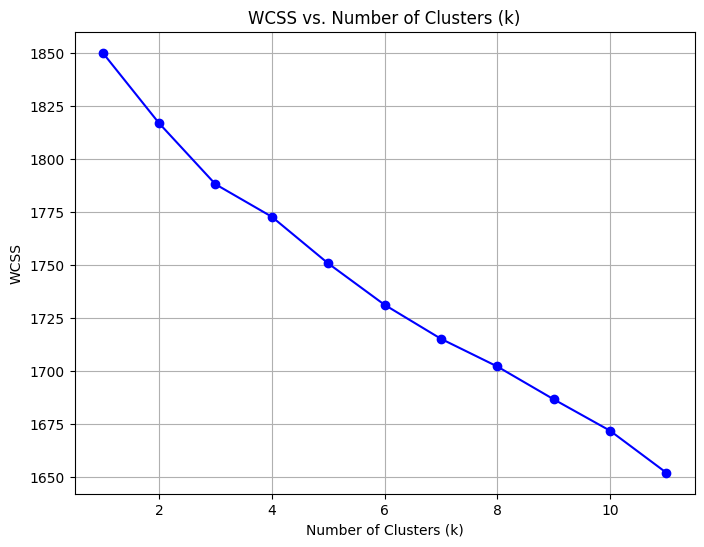

In [243]:
# Cell 20

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the TF-IDF features (X_train_smote) to find optimal clusters
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_smote)  # Use X_train_smote instead of X_train_tfidf
    wcss.append(kmeans.inertia_)
print(wcss)

# Plot the WCSS values to observe the elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), wcss, marker='o', linestyle='-', color='b')
plt.title('WCSS vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## **Step 2 - Implement K-Means clustering on the preprocessed text data**

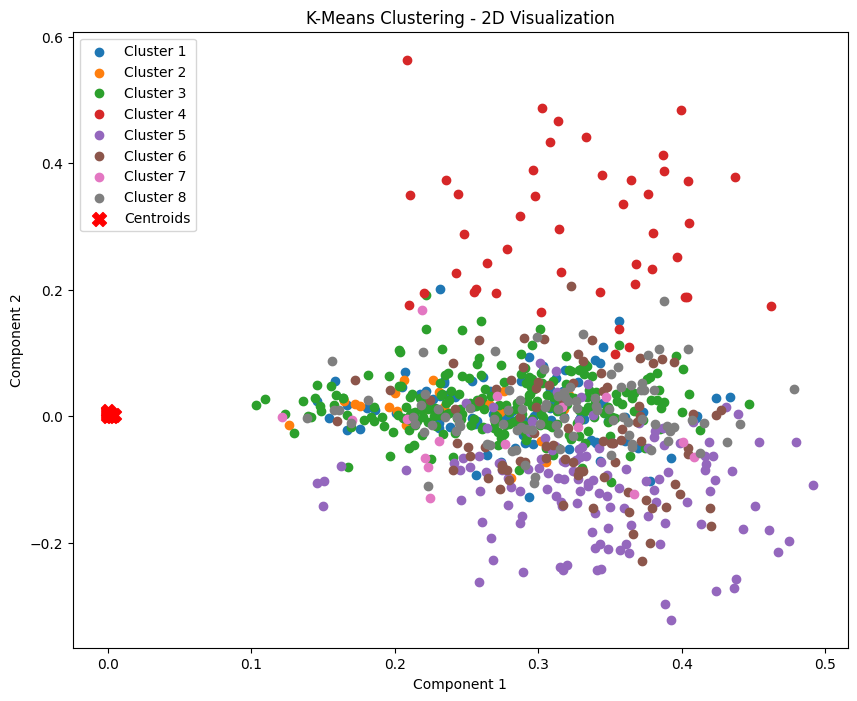

In [244]:
# Cell 21 (Visualization of Clusters)

from sklearn.decomposition import TruncatedSVD

# Choose the optimal number of clusters from the elbow method
optimal_clusters = 8  # Replace this with the number you find optimal

# Implementing K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_train_tfidf)

# Reduce dimensionality for visualization using TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train_tfidf)

# Visualize the clusters
plt.figure(figsize=(10, 8))
for i in range(optimal_clusters):
    plt.scatter(X_svd[y_kmeans == i, 0], X_svd[y_kmeans == i, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering - 2D Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


## **Step 3 - Interpret the clusters to find patterns corresponding to different emotions.**

In [257]:
# Function to print top terms per cluster
def print_top_terms_per_cluster(vectorizer, kmeans, n_terms=10):
    """
    Print the top terms per cluster based on the fitted TF-IDF vectorizer and K-Means clustering model.

    Parameters:
    - vectorizer: The fitted TF-IDF vectorizer.
    - kmeans: The fitted K-Means clustering model.
    - n_terms: Number of top terms to display per cluster (default is 10).
    """
    # Get the indices of terms in descending order of importance for each cluster
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    # Get the feature names (terms) from the TF-IDF vectorizer
    terms = vectorizer.get_feature_names_out()
    # Print top terms for each cluster
    for i in range(len(kmeans.cluster_centers_)):
        print("Cluster %d top terms:" % i, end='')
        # Calculate the actual number of terms to display (up to n_terms or the number of available terms)
        num_terms_to_display = min(n_terms, len(terms))
        for ind in order_centroids[i, :num_terms_to_display]:
            print(' %s' % terms[ind], end=', ')
        print("\n")


# **Model Insights**

## **Step 1 - Analyze the performance of the SVM classifier on Holdout Dataset**

In [246]:
# Apply tokenization to each JSON column in holdout_df
for col in json_columns:
    col_name = f'tokenized_{col}'
    holdout_df[col_name] = holdout_df[col].apply(lambda x: tokenize_utterances(x, key='utterance'))

# Display the results for verification
print("Modified Holdout DataFrame:")
print(holdout_df[[f'tokenized_{col}' for col in json_columns]].head())

from sklearn.feature_extraction.text import TfidfVectorizer

# Function for TF-IDF Vectorization
def tfidf_vectorization(train_df, holdout_df, processed_columns):
    # Combine the tokens into strings for train and holdout data
    train_df['combined_text'] = train_df[processed_columns].apply(lambda row: ' '.join([' '.join(tokens) for tokens in row]), axis=1)
    holdout_df['combined_text'] = holdout_df[processed_columns].apply(lambda row: ' '.join([' '.join(tokens) for tokens in row]), axis=1)

    # Initialize the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the combined text for training data
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['combined_text'])

    # Transform the combined text for holdout data using the same vectorizer
    X_holdout_tfidf = tfidf_vectorizer.transform(holdout_df['combined_text'])

    return X_train_tfidf, X_holdout_tfidf, tfidf_vectorizer

# Call the function for TF-IDF Vectorization
X_train_tfidf, X_holdout_tfidf, tfidf_vectorizer = tfidf_vectorization(train_df, holdout_df, processed_columns)

# Display the shape of the TF-IDF matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_holdout_tfidf:", X_holdout_tfidf.shape)



Modified Holdout DataFrame:
                                         tokenized_0  \
0  [Oh, my, God, ,, hes, lost, it, ., Hes, tota...   
1                          [Hey, Estelle, ,, listen]   
2     [Yes, ?, Yes, ?, !, How, can, I, help, you, ?]   
3  [You, had, no, right, to, tell, me, you, ever,...   
4  [Oh, ,, it, 's, so, romantic, to, send, people...   

                                         tokenized_1  \
0                                          [What, ?]   
1  [Well, !, Well, !, Well, !, Joey, Tribbiani, !...   
2  [Yeah, ,, we, were, we, were, just, looking, a...   
3                                          [What, ?]   
4  [Yknow, ,, Monica, and, Chandler, are, marrie...   

                                         tokenized_2  \
0  [Or, !, Or, ,, we, could, go, to, the, bank, ,...   
1  [What, are, you, talkin, about, ?, I, never, ...   
2     [Oh-oh, ,, youre-youre, fellow, scholars, .]   
3  [I, was, doing, great, with, Julie, before, I,...   
4                 

In [247]:
# Example code for fitting SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

y_holdout = holdout_df.apply(extract_emotion, axis=1)
# Example code for generating predictions on the holdout data
y_pred_holdout = svm_classifier.predict(X_holdout_tfidf)

# Print the classification report and accuracy of the SVM classifier on holdout data
print("SVM Classifier - Classification Report on Holdout Dataset:")
print(classification_report(y_holdout, y_pred_holdout, zero_division=1))
print("SVM Classifier - Accuracy Score on Holdout Dataset:")
print(accuracy_score(y_holdout, y_pred_holdout))


SVM Classifier - Classification Report on Holdout Dataset:
              precision    recall  f1-score   support

       anger       1.00      0.00      0.00         6
        fear       1.00      0.00      0.00         1
         joy       1.00      0.00      0.00        16
     neutral       0.42      1.00      0.60        34
 non-neutral       1.00      0.00      0.00        11
     sadness       1.00      0.00      0.00         2
    surprise       1.00      0.00      0.00        10

    accuracy                           0.42        80
   macro avg       0.92      0.14      0.09        80
weighted avg       0.76      0.42      0.25        80

SVM Classifier - Accuracy Score on Holdout Dataset:
0.425


## **Step 2 - Analyze the clusters formed by K-Means.**

In [248]:
# Cell 24

# Assuming you have clusters and emotion labels defined
cluster_emotion_mapping = {
    0: "joy",
    1: "non-neutral",
    2: "neutral",
    3: "non-neutral",
    4: "non-neutral",
    5: "neutral",
    6: "surprise",
    7: "non-neutral"
}

# Assign emotions to clusters based on your criteria
cluster_emotions = {}
for cluster_id, emotion_label in cluster_emotion_mapping.items():
    cluster_emotions[cluster_id] = emotion_label

# Print cluster-emotion assignments
for cluster_id, emotion in cluster_emotions.items():
    print(f"Cluster {cluster_id}: Emotion - {emotion}")


Cluster 0: Emotion - joy
Cluster 1: Emotion - non-neutral
Cluster 2: Emotion - neutral
Cluster 3: Emotion - non-neutral
Cluster 4: Emotion - non-neutral
Cluster 5: Emotion - neutral
Cluster 6: Emotion - surprise
Cluster 7: Emotion - non-neutral


## **Step 3 - Compare and contrast the results obtained from both SVM and K-Means also insights into the emotional trends captured by the models**

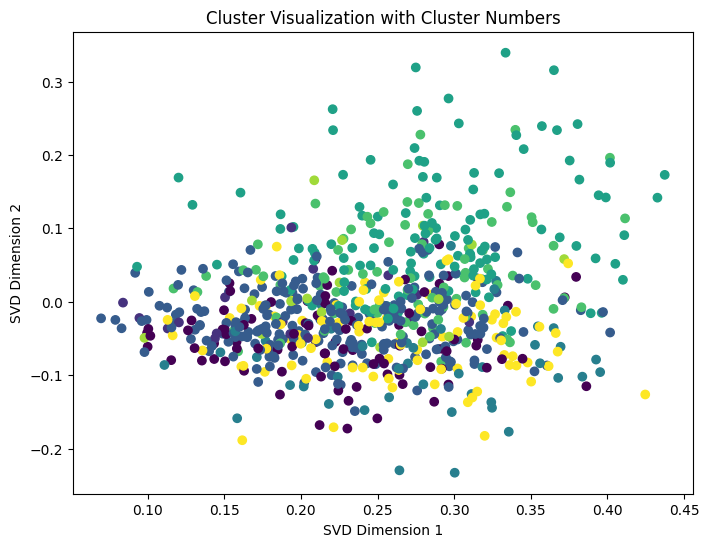

In [249]:
# Cell 25

from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train_tfidf' is your TF-IDF matrix
# Assuming 'cluster_labels' contains cluster assignments
# Assuming 'cluster_emotions' contains emotion labels

# Map emotion labels to numeric values
emotion_to_numeric = {
    "joy": 0,
    "non-neutral": 1,
    "neutral": 2,
    "surprise": 3,
    "anger": 4,
    "sadness": 5,
    "disgust": 6,
    "fear": 7
}
numeric_emotions = [emotion_to_numeric[cluster_emotions[cluster_id]] for cluster_id in sorted(np.unique(y_kmeans))]


# Perform Truncated SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train_tfidf)

# Create a scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_kmeans, cmap='viridis')

# # Create a legend with cluster numbers
# legend_labels = [f"Cluster {label}" for label in cluster_emotions.keys()]  # Use cluster numbers instead of emotion labels

# # Add the legend
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) for c in scatter.cmap(np.unique(scatter.to_rgba(numeric_emotions)))]
# plt.legend(handles, legend_labels, title='Cluster Legend', loc='upper right')

plt.title("Cluster Visualization with Cluster Numbers")
plt.xlabel("SVD Dimension 1")
plt.ylabel("SVD Dimension 2")
plt.show()
# Cell 26

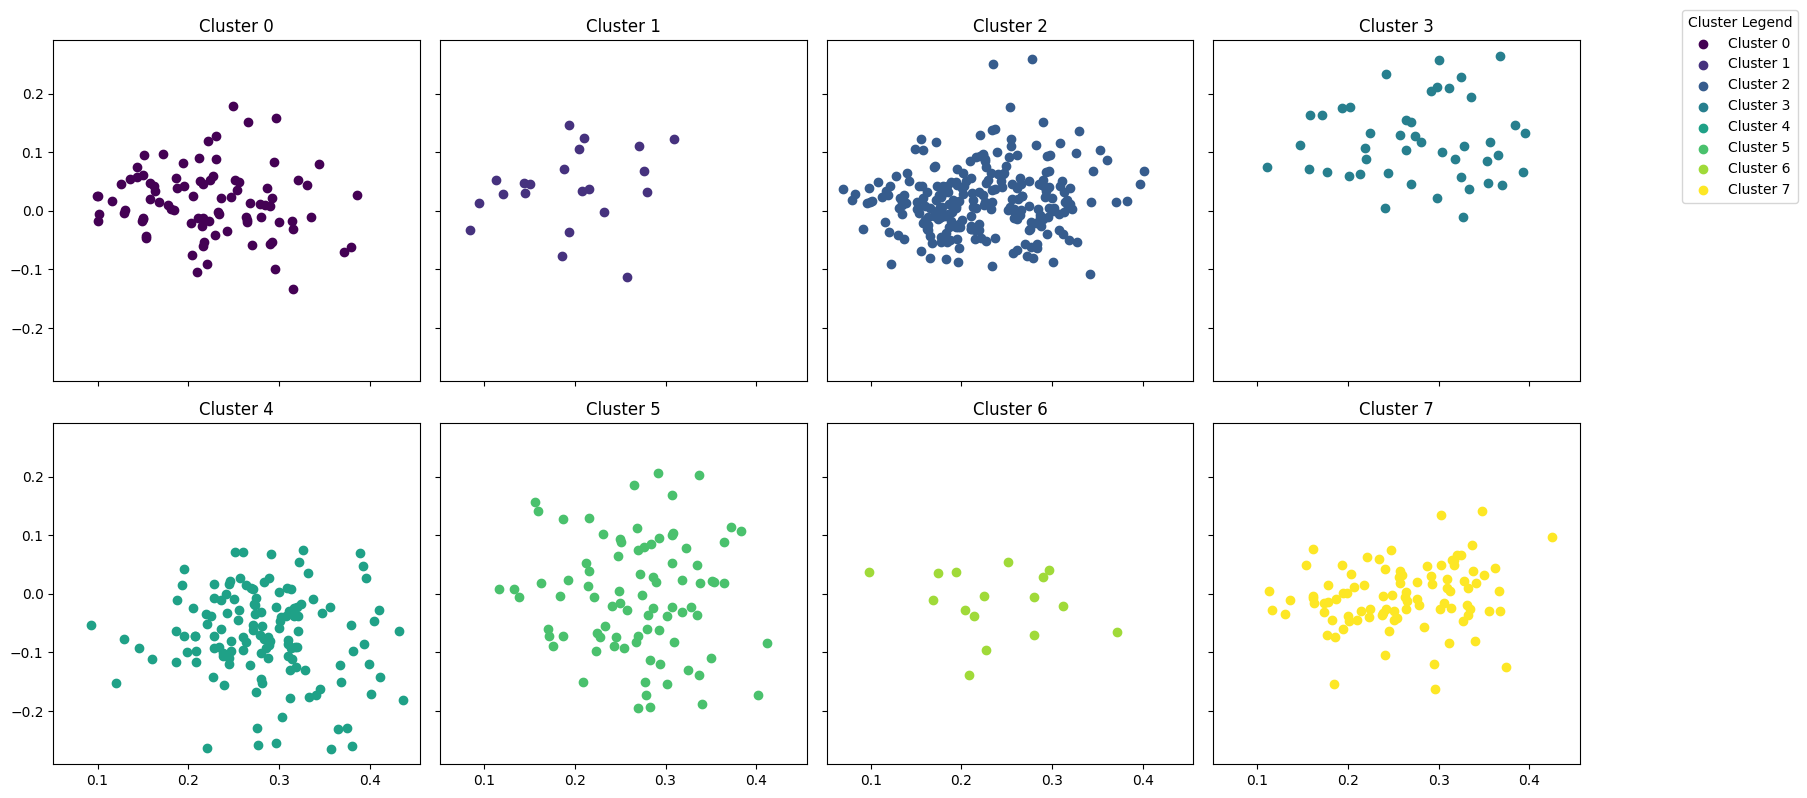

In [250]:
# Cell 26

# Assuming 'X_train_tfidf' is your TF-IDF matrix
# Assuming 'y_kmeans' contains cluster assignments
# Assuming 'cluster_labels' contains emotion labels

# Mapping clusters to emotion labels
cluster_emotions = {
    0: "non-neutral",
    1: "neutral",
    2: "joy",
    3: "non-neutral",
    4: "non-neutral",
    5: "neutral",
    6: "surprise",
    7: "non-neutral"
}

# Convert emotion labels to numeric values based on the mapping
numeric_emotions = [emotion_to_numeric[cluster_emotions[cluster_id]] for cluster_id in sorted(np.unique(y_kmeans))]


# Perform Truncated SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train_tfidf)

# Create a scatter plot for each non-empty cluster
fig, axs = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey=True)
axs = axs.flatten()

# Get the unique colors from the viridis color map for the clusters
cluster_colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, len(np.unique(y_kmeans)))]

# ...

for cluster_id, ax, color in zip(sorted(np.unique(y_kmeans)), axs, cluster_colors):
    cluster_mask = y_kmeans == cluster_id
    if np.any(cluster_mask):
        ax.scatter(X_svd[cluster_mask, 0], X_svd[cluster_mask, 1], c=[color], label=f'Cluster {cluster_id}')
        ax.set_title(f"Cluster {cluster_id}")

# Add a common legend
fig.legend(title='Cluster Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [251]:
# cell 27

# Assuming 'y_kmeans' contains K-Means cluster assignments (0 to 7)
# Assuming 'cluster_emotion_mapping' is the dictionary defined in Cell 23

# Create empty lists to store aligned emotional labels and cluster assignments
aligned_emotional_labels = []
cluster_assignments = []

# Iterate through K-Means cluster assignments
for cluster_assignment in y_kmeans:
    # Map the cluster assignment to the corresponding emotional label
    emotional_label = cluster_emotion_mapping.get(cluster_assignment, "Unknown")
    # Append the aligned emotional label to the list
    aligned_emotional_labels.append(emotional_label)
    # Append the cluster assignment to the list
    cluster_assignments.append(cluster_assignment)

# Verify the aligned emotional labels and cluster assignments by printing them
print("Aligned Emotional Labels:")
print(aligned_emotional_labels)

print("Cluster Assignments:")
print(cluster_assignments)


Aligned Emotional Labels:
['non-neutral', 'joy', 'non-neutral', 'non-neutral', 'non-neutral', 'joy', 'neutral', 'non-neutral', 'neutral', 'joy', 'neutral', 'neutral', 'non-neutral', 'neutral', 'neutral', 'neutral', 'non-neutral', 'non-neutral', 'neutral', 'neutral', 'non-neutral', 'neutral', 'neutral', 'non-neutral', 'non-neutral', 'non-neutral', 'neutral', 'non-neutral', 'neutral', 'neutral', 'non-neutral', 'neutral', 'neutral', 'neutral', 'non-neutral', 'neutral', 'non-neutral', 'neutral', 'non-neutral', 'non-neutral', 'joy', 'neutral', 'neutral', 'non-neutral', 'non-neutral', 'non-neutral', 'neutral', 'non-neutral', 'joy', 'neutral', 'neutral', 'non-neutral', 'non-neutral', 'neutral', 'non-neutral', 'joy', 'non-neutral', 'non-neutral', 'neutral', 'non-neutral', 'non-neutral', 'non-neutral', 'neutral', 'neutral', 'neutral', 'non-neutral', 'neutral', 'neutral', 'neutral', 'non-neutral', 'neutral', 'non-neutral', 'neutral', 'non-neutral', 'non-neutral', 'neutral', 'non-neutral', 'non-n

In [252]:
# Create empty lists to store the data
document_ids = []
svm_predicted_emotions = []
y_kmeans = []
cluster_emotions = []

# Mapping clusters to emotion labels
cluster_emotions_mapping = {
    0: "non-neutral",
    1: "neutral",
    2: "joy",
    3: "non-neutral",
    4: "non-neutral",
    5: "neutral",
    6: "surprise",
    7: "non-neutral"
}
# Iterate through the DataFrame rows
for i in range(0, 720):  # Use the length of aligned_emotional_labels as the loop range
    # Extract the relevant information from the JSON objects in each row
    document_id = i  # You can use the loop index as Document ID
    svm_predicted_emotion = y_train[i]
    k_means_cluster = cluster_assignments[i]
    cluster_emotion = cluster_emotions_mapping.get(k_means_cluster, "Unknown")

    
    document_ids.append(document_id)
    svm_predicted_emotions.append(svm_predicted_emotion)
    y_kmeans.append(k_means_cluster)
    cluster_emotions.append(cluster_emotion)
    
# Create a DataFrame to store the findings
findings_df = pd.DataFrame({
    'Document ID': document_ids,
    'SVM Predicted Emotion': svm_predicted_emotions,
    'K-Means Cluster': y_kmeans,
    'Cluster Emotion': cluster_emotions,
    'SVM Matches Cluster Emotion': (findings_df['SVM Predicted Emotion'] == findings_df['Cluster Emotion'])
})

# Display the table
print("Table summarizing the findings:")
print(findings_df)


Table summarizing the findings:
     Document ID SVM Predicted Emotion  K-Means Cluster Cluster Emotion  \
0              0               neutral                3     non-neutral   
1              1               neutral                0     non-neutral   
2              2           non-neutral                7     non-neutral   
3              3                   joy                3     non-neutral   
4              4               neutral                1         neutral   
..           ...                   ...              ...             ...   
715          715                   joy                2             joy   
716          716               neutral                2             joy   
717          717               neutral                7     non-neutral   
718          718                   joy                7     non-neutral   
719          719               neutral                2             joy   

     SVM Matches Cluster Emotion  
0                          False

In [253]:
findings_df.head(50)

,Document ID,SVM Predicted Emotion,K-Means Cluster,Cluster Emotion,SVM Matches Cluster Emotion
0,0,neutral,3,non-neutral,False
1,1,neutral,0,non-neutral,False
2,2,non-neutral,7,non-neutral,True
3,3,joy,3,non-neutral,False
4,4,neutral,1,neutral,True
5,5,neutral,0,non-neutral,False
6,6,anger,5,neutral,False
7,7,non-neutral,7,non-neutral,True
8,8,joy,2,joy,True
9,9,anger,0,non-neutral,False


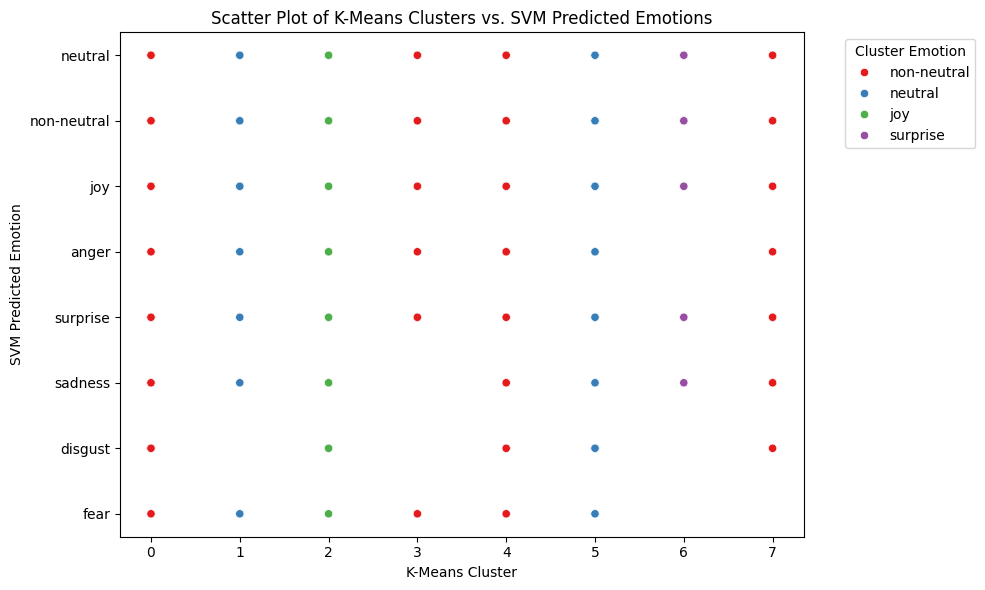

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'findings_df' with columns 'K-Means Cluster', 'SVM Predicted Emotion', and 'Cluster Emotion'

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='K-Means Cluster', y='SVM Predicted Emotion', hue='Cluster Emotion', data=findings_df, palette='Set1')

# Add labels and a legend
plt.xlabel('K-Means Cluster')
plt.ylabel('SVM Predicted Emotion')
plt.title('Scatter Plot of K-Means Clusters vs. SVM Predicted Emotions')

# Move the legend outside the plot
plt.legend(title='Cluster Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Ensures the legend is not cut off
plt.show()


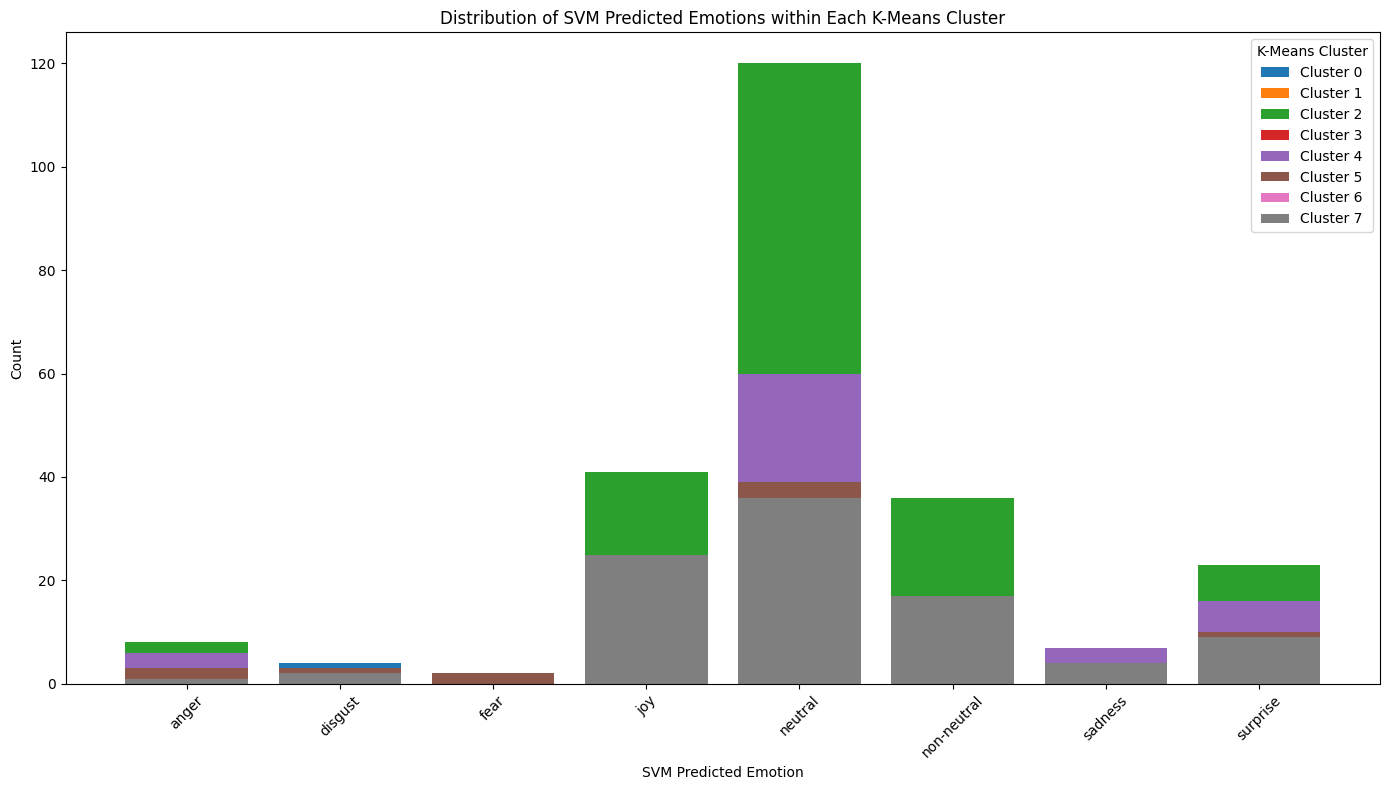

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'findings_df' with columns 'K-Means Cluster' and 'SVM Predicted Emotion'

# Group the data by K-Means clusters and SVM predicted emotions
grouped = findings_df.groupby(['K-Means Cluster', 'SVM Predicted Emotion']).size().unstack(fill_value=0)

# Get a list of unique K-Means clusters
clusters = sorted(findings_df['K-Means Cluster'].unique())

# Create a bar chart for each cluster
plt.figure(figsize=(14, 8))
for cluster in clusters:
    emotions = grouped.loc[cluster].index
    counts = grouped.loc[cluster].values
    plt.bar(emotions, counts, label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('SVM Predicted Emotion')
plt.ylabel('Count')
plt.title('Distribution of SVM Predicted Emotions within Each K-Means Cluster')

# Add a legend
plt.legend(title='K-Means Cluster', loc='upper right')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


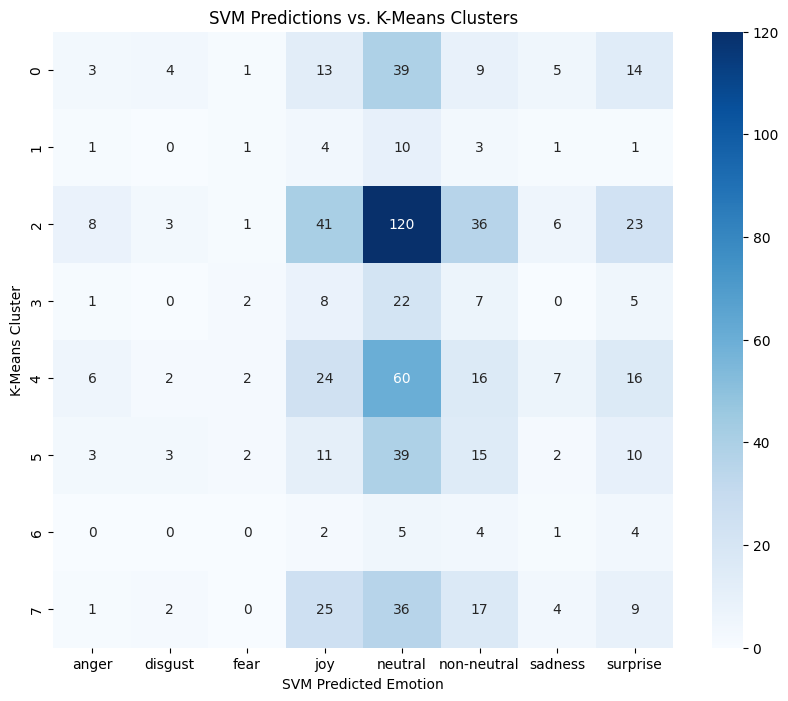

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming you have a DataFrame 'findings_df' with columns 'K-Means Cluster' and 'SVM Predicted Emotion'

# Create a confusion matrix
confusion = pd.crosstab(findings_df['K-Means Cluster'], findings_df['SVM Predicted Emotion'])

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('SVM Predicted Emotion')
plt.ylabel('K-Means Cluster')
plt.title('SVM Predictions vs. K-Means Clusters')

# Show the plot
plt.show()
